In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Generate points 
np.random.multivariate_normal 

<function RandomState.multivariate_normal>

In [6]:
mean_1 = np.array([5,3])
cov_1 = np.array([[1,1.3],[1.3,1]])

In [7]:
mean_2 = np.array([13,15])
cov_2 = np.array([[1,1.3],[1.3,1]])

In [8]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1,500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2,500)

C:\Users\Abhishek Yadav\AppData\Local\Temp\ipykernel_5684\2145098427.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1,500)
C:\Users\Abhishek Yadav\AppData\Local\Temp\ipykernel_5684\2145098427.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2,500)


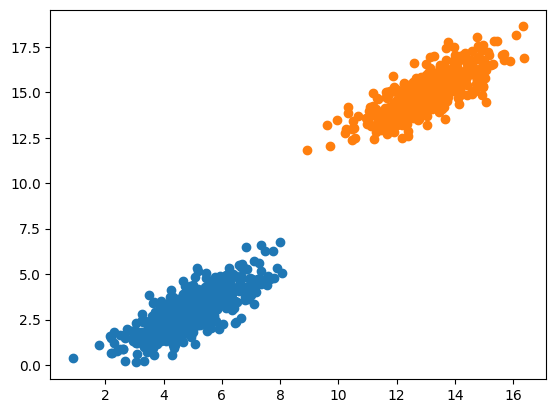

In [9]:
plt.scatter(dist_1[:,0], dist_1[:, 1])
plt.scatter(dist_2[:,0], dist_2[:, 1])

In [10]:
print(dist_1.shape, dist_2.shape)

(500, 2) (500, 2)


In [11]:
dataset = np.zeros((1000, 3))

In [12]:
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2


dataset[500:, -1] = 1

In [13]:
dataset

array([[ 6.57934398,  4.06994779,  0.        ],
       [ 5.6408092 ,  2.04740835,  0.        ],
       [ 5.16743029,  3.40494917,  0.        ],
       ...,
       [12.37304969, 14.86402806,  1.        ],
       [14.12275813, 15.32971662,  1.        ],
       [14.17918306, 14.914319  ,  1.        ]])

In [14]:
np.random.shuffle(dataset)

In [15]:
# ones = np.ones((dataset.shape[0],1))
# dataset = np.hstack((ones, dataset))
dataset

array([[ 6.93583851,  3.67272261,  0.        ],
       [ 4.20004995,  2.50101518,  0.        ],
       [11.97824262, 13.93608683,  1.        ],
       ...,
       [ 6.35927344,  3.61337419,  0.        ],
       [ 2.50037275,  0.9100553 ,  0.        ],
       [15.8976508 , 16.71985429,  1.        ]])

In [16]:
split = 0.8
train_X = dataset[:int(split* dataset.shape[0]), :-1]
train_Y = dataset[:int(split* dataset.shape[0]), -1]

test_X = dataset[int(split* dataset.shape[0]):, :-1]
test_Y = dataset[int(split* dataset.shape[0]):, -1]

In [17]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((800, 2), (800,), (200, 2), (200,))

In [18]:
 def sigmoid(X):
     return 1/(1 + np.exp(-X))

In [19]:
def hypothesis(X, weight):
    return sigmoid(np.dot(X, weight))

In [20]:
def loss(X, Y, weight):
    y_p = hypothesis(X, weight)
    loss = np.mean(Y * np.log(y_p) + (1-Y) * np.log(1- y_p))
    return -1 * loss

In [21]:
def gradient(X, Y, weight):
    y_p = hypothesis(X, weight)
    grad = np.dot(X.T, (Y- y_p))
    return grad/X.shape[0]

In [22]:
def gradient_descent(X, Y):
    epochs = 100000
    lr_rate = 0.03
    cost = []
    weight = np.zeros((X.shape[1],))
    
    for i in range(epochs):
        cost.append(loss(X, Y, weight))
        grad = gradient(X, Y, weight)
        print(f'On:{i}', end = '\r')
        weight = weight + lr_rate * grad
        
    return weight, cost

In [23]:
ones = np.ones((train_X.shape[0], 1))
train_X = np.hstack((ones, train_X))

ones = np.ones((test_X.shape[0], 1))
test_X = np.hstack((ones, test_X))

In [24]:
weight, cost = gradient_descent(train_X, train_Y)

In [25]:
cost

[0.6931471805599452,
 0.5715446306576161,
 0.5494361903282237,
 0.5393651301653279,
 0.5299495273071608,
 0.5207829105221797,
 0.5118581294018189,
 0.5031690767585604,
 0.49470967387047277,
 0.4864738823977776,
 0.478455717114996,
 0.4706492574567133,
 0.4630486578682598,
 0.4556481569999073,
 0.44844208579190536,
 0.4414248745034241,
 0.43459105874271503,
 0.4279352845587344,
 0.4214523126562426,
 0.415137021797144,
 0.4089844114507001,
 0.40298960375437576,
 0.3971478448455862,
 0.39145450562262596,
 0.3859050819906766,
 0.38049519464611564,
 0.37522058844946693,
 0.3700771314343044,
 0.36506081349633335,
 0.360167744803759,
 0.35539415396696356,
 0.350736386002493,
 0.3461909001234186,
 0.34175426738531894,
 0.3374231682144401,
 0.33319438984204097,
 0.32906482366653406,
 0.325031462562783,
 0.3210913981558281,
 0.31724181807436885,
 0.31348000319754443,
 0.3098033249069042,
 0.30620924235395514,
 0.3026952997522983,
 0.29925912370211405,
 0.29589842055362714,
 0.2926109738151578,
 

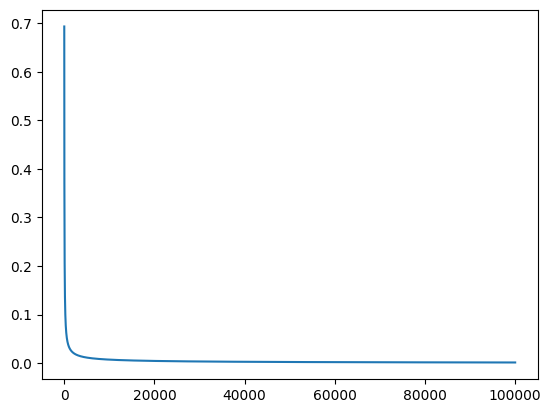

In [26]:
plt.plot(cost)

In [27]:
weight

array([-6.1023887 , -3.35939907,  4.08107906])

In [28]:
corr = 0
for i in range(test_X.shape[0]):
    pred = hypothesis(test_X[i],weight )
    print(pred)
    if pred > 0.5:
        pred = 1
        if pred == test_Y[i]:
            corr += 1
    else:
        pred = 0
        if pred == test_Y[i]:
            corr += 1

0.9999993078132849
9.222383296757756e-07
0.9999966303828517
0.9997865431649374
1.5713866829234083e-06
0.9999998374764139
0.9999969714669075
0.9997643197730963
0.0005303268360765886
0.9999971557950822
0.9999996290051973
5.563296303384067e-07
5.542608866835193e-06
0.9999758062867444
2.412642688870565e-05
1.341794696501468e-06
0.9999484227427099
0.00018753422799954172
6.819956603264328e-05
1.1870945617037559e-07
0.9999040397836586
0.9998434901000854
1.7903851014677566e-05
2.296329445369505e-06
0.00011378773952594952
0.00020924307915065162
0.9999997342580293
3.2868441369041295e-05
0.0025139075583673243
4.571262572560796e-06
0.9999981213380325
1.0118953907354111e-05
0.999969684295683
0.000211737278454748
5.4092756336038805e-05
2.757912300268632e-07
0.9999786737596854
0.00013388056816204656
8.721588821176515e-06
1.935729183617882e-05
2.8127801838104435e-05
0.9999985644466978
0.9999957205206647
0.9999103088714801
0.9999914043804374
0.999124148424746
4.801925120979324e-05
0.02528737548281512
0

In [31]:
corr/test_X.shape[0]

1.0